In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/ambulance_routing_dataset1.csv'
df = pd.read_csv(file_path)

In [4]:
print(df.columns)

Index(['Ambulance Latitude', 'Ambulance Longitude', 'Hospital Latitude',
       'Hospital Longitude', 'Traffic Level', 'Weather Type', 'Road Type',
       'Distance to Hospital', 'Traffic Speed', 'Time of Day',
       'Estimated Travel Time (Target)'],
      dtype='object')


In [5]:
df.head()

,Ambulance Latitude,Ambulance Longitude,Hospital Latitude,Hospital Longitude,Traffic Level,Weather Type,Road Type,Distance to Hospital,Traffic Speed,Time of Day,Estimated Travel Time (Target)
0,12.956638,77.626077,13.0,77.7,Moderate,Snowy,Main Road,9.349159,49.035258,Evening,11.439718
1,12.871174,77.845704,13.1,77.8,Low,Rainy,Highway,25.921695,81.070959,Morning,19.184449
2,12.904345,77.892298,12.9,77.6,Moderate,Rainy,Highway,31.685155,31.874026,Afternoon,59.644467
3,13.100339,77.989387,12.9,77.6,Low,Clear,Highway,47.708350,69.246106,Afternoon,41.338079
4,13.070092,77.769220,12.9,77.6,High,Foggy,Residential,26.341923,15.283910,Afternoon,103.410409


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score
import math

 #CNN-LSTM Model
def create_cnn_lstm_model(input_shape):
    inputs = Input(shape=input_shape)

    #for feature extraction
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)

    # LSTM layers for temporal dependencies
    x = LSTM(128, return_sequences=True)(x)
    x = LSTM(64)(x)

    # Fully connected layer
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)

    # Output layer (for regression)
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs, outputs)
    return model

input_shape = (X_train.shape[1], X_train.shape[2])  # Input shape: (timesteps, features)
model = create_cnn_lstm_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[lr_scheduler],
    verbose=1
)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}, Test MAE: {mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 881.6614 - mae: 17.7359 - val_loss: 16.6094 - val_mae: 2.0998 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 35.3490 - mae: 3.6101 - val_loss: 7.6455 - val_mae: 1.6642 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 30.0814 - mae: 3.3719 - val_loss: 6.0772 - val_mae: 1.6140 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 29.5730 - mae: 3.3273 - val_loss: 23.3351 - val_mae: 3.4644 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 27.9742 - mae: 3.2267 - val_loss: 8.5838 - val_mae: 1.9360 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 29.1060 - mae: 3.2567 - val_loss: 6.1116 - val_mae: 1.4849 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 28.2002 - mae: 3.2053 - val_loss: 4.5053 - val_mae

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


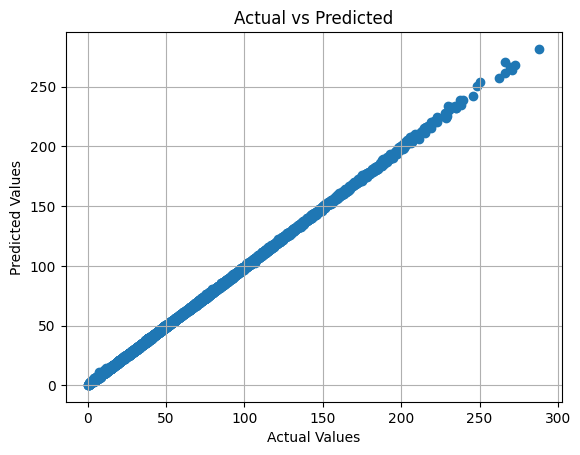

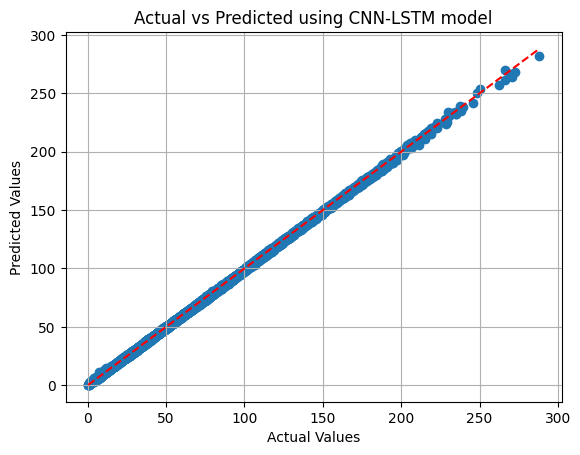

In [33]:
import numpy as np
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='r')  # Ideal case line (y = x)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted using CNN-LSTM model')
plt.grid(True)
plt.show()


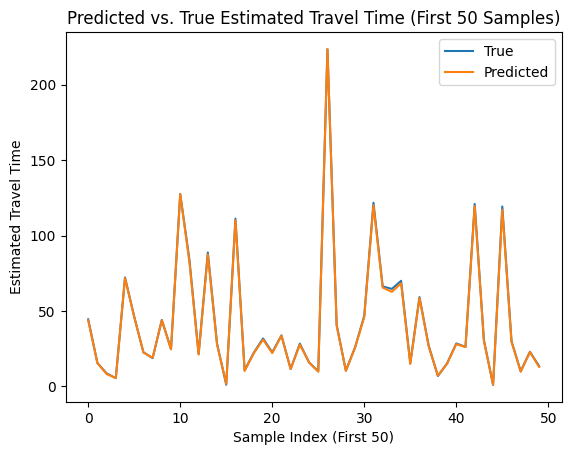

In [35]:
plt.plot(y_test[:50], label="True")
plt.plot(y_pred[:50], label="Predicted")
plt.xlabel("Sample Index (First 50)")
plt.ylabel("Estimated Travel Time")
plt.title("Predicted vs. True Estimated Travel Time (First 50 Samples)")
plt.legend()
plt.show()


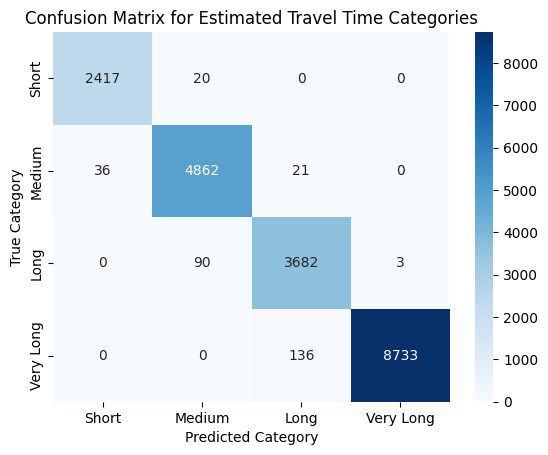

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

bins = [0, 10, 20, 30, np.inf]
y_true_binned = np.digitize(y_test, bins) - 1
y_pred_binned = np.digitize(y_pred, bins) - 1


cm = confusion_matrix(y_true_binned, y_pred_binned)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Short", "Medium", "Long", "Very Long"],
            yticklabels=["Short", "Medium", "Long", "Very Long"])
plt.xlabel("Predicted Category")
plt.ylabel("True Category")
plt.title("Confusion Matrix for Estimated Travel Time Categories")
plt.show()


In [37]:
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score, median_absolute_error, max_error


mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_e = max_error(y_test, y_pred)


metrics_dict = {
    "Metric": ["MAE", "MSE", "RMSE", "R2 Score", "MAPE", "Explained Variance", "Median Absolute Error", "Max Error", "Adjusted R2"],
    "Value": [mae, mse, rmse, r2, mape, evs, medae, max_e, r2 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)]
}


metrics_df = pd.DataFrame(metrics_dict)


print(metrics_df)


                  Metric     Value
0                    MAE  0.505011
1                    MSE  0.542288
2                   RMSE  0.736402
3               R2 Score  0.999555
4                   MAPE  0.016665
5     Explained Variance  0.999702
6  Median Absolute Error  0.311744
7              Max Error  6.669485
8            Adjusted R2  0.999110
